# Ayudantía 0: Introducción, Test A/B y Test de Hipótesis

**Ayudante: Thomas Buddemberg**

**Mail: tbuddemberg@alumnos.uai.cl**

**Whatsapp: +569 7532 8800**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ayudantía-0:-Introducción,-Test-A/B-y-Test-de-Hipótesis" data-toc-modified-id="Ayudantía-0:-Introducción,-Test-A/B-y-Test-de-Hipótesis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ayudantía 0: Introducción, Test A/B y Test de Hipótesis</a></span></li><li><span><a href="#Quién-soy?" data-toc-modified-id="Quién-soy?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quién soy?</a></span></li><li><span><a href="#Motivaciones" data-toc-modified-id="Motivaciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivaciones</a></span></li><li><span><a href="#AB-Test" data-toc-modified-id="AB-Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AB Test</a></span><ul class="toc-item"><li><span><a href="#¿Cómo-medir-el-efecto?" data-toc-modified-id="¿Cómo-medir-el-efecto?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>¿Cómo medir el efecto?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-4.1.0.1"><span class="toc-item-num">4.1.0.1&nbsp;&nbsp;</span>Introducción</a></span></li></ul></li><li><span><a href="#Método-1:-Pearson's-Chi-Square-Test" data-toc-modified-id="Método-1:-Pearson's-Chi-Square-Test-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Método 1: Pearson's Chi Square Test</a></span></li><li><span><a href="#Método-2:-Two-Sample-proportions-Z-test" data-toc-modified-id="Método-2:-Two-Sample-proportions-Z-test-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Método 2: Two-Sample proportions Z-test</a></span></li><li><span><a href="#Test-de-hipótesis" data-toc-modified-id="Test-de-hipótesis-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Test de hipótesis</a></span></li></ul></li></ul></li></ul></div>

# Quién soy?

**Thomas Buddemberg Astudillo**

- **Master of Science in Data Science 2022 - UAI**

- **Tesis en Inferencia Causal**

<img src=>

**Todos sabemos que correlación no es igual a causalidad**

<img src=https://www.tylervigen.com/correlation_project/correlation_images/number-people-who-drowned-by-falling-into-a-swimming-pool_number-of-films-niclas-cage-appeared-in.png>

<img src=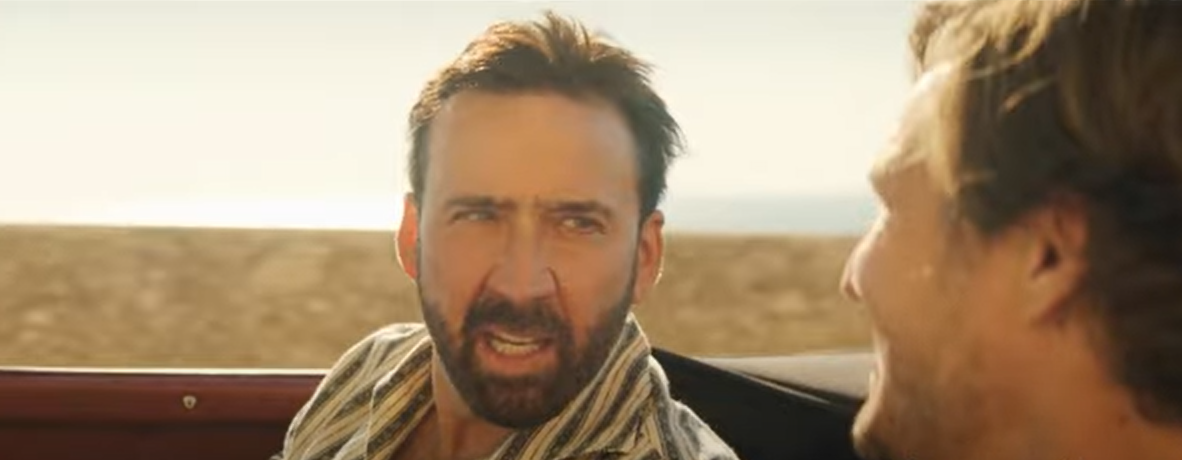>

La mayoría de modelos de Machine Learning en la actualidad buscan correlaciones de los datos con el objetivo. La causalidad viene como herramienta para identificar los factores que afectan al objetivo y de qué manera lo hacen.
**El objetivo de este curso es proporcionar unos conocimientos básicos, así como las herramientas para poder solucionar problemas de inferencia y modelado causal**

# Motivaciones

- Entender cómo interactúan las diferentes variables

- Ver cuánto afecta una variable sobre otra (ATE)

- Plantear contrafactuales: ¿Qué habría sucedido si hubiera hecho otra cosa?

# AB Test

<img src=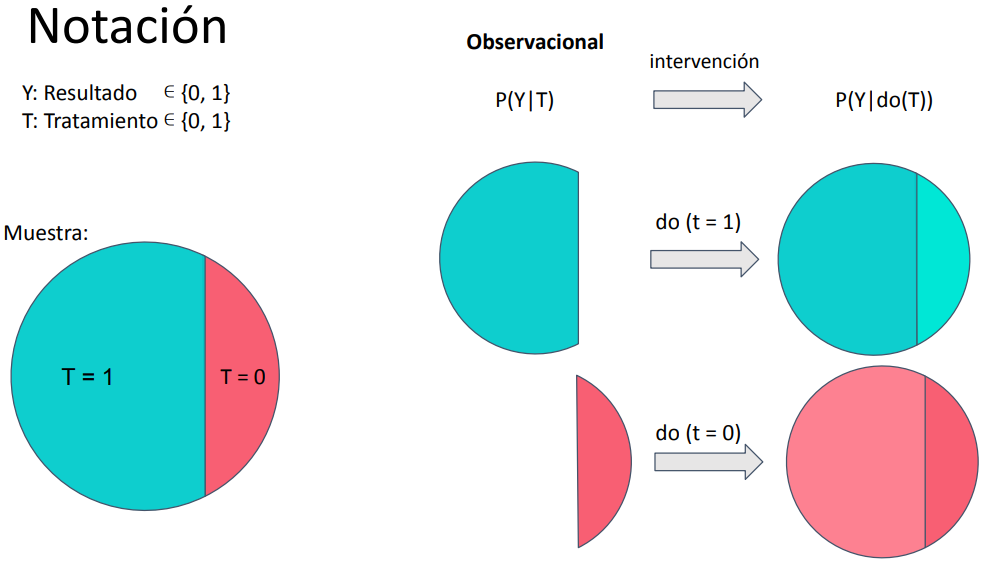>

<img src=>

## ¿Cómo medir el efecto?

#### Introducción

En este proyecto, realizaremos un análisis de los resultados de una **prueba A/B** realizada por un sitio web de comercio electrónico. **Nuestro principal objetivo será decidir si el cambio funcionaría mejor para la empresa o no**.

![](https://i.imgur.com/lpYg1sw.gif)

In [3]:
import numpy as np 
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

**Conjunto de datos**

El conjunto de datos que se utilizará para el análisis consta de 5 columnas:

- ***user_id:*** ID de usuario único
- ***timestamp:*** representa cuándo comienza una sesión para un usuario.
- ***group:*** contiene 2 valores diferentes como control y tratamiento.
- ***landing_page:*** contiene 2 valores diferentes como `old_page` y `new_page`.
- ***converted:*** representa el comportamiento del usuario: si un usuario realizó una compra (1) o no (0).

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()
df.shape
df.info()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


(294478, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
# Comprobar si los ID de usuario son únicos
df.user_id.nunique()
df.shape[0]

290584

294478

**Investigando el grupo y la relación landing_page**

In [6]:
print('Group info:')
df.group.value_counts()
print('\nLanding Page info:',)
df.landing_page.value_counts()

Group info:


treatment    147276
control      147202
Name: group, dtype: int64


Landing Page info:


old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [7]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


**Se esperaba que el grupo de control fuera dirigido a la página anterior mientras que el grupo de tratamiento fuera dirigido a la nueva.
Pero parece que, antes que nada, necesito resolverlo para que un grupo sea dirigido solo a la página nueva o a la anterior.**

Deshagámonos de los registros que nos confunden.

In [8]:
df=df[~((df.group=='control')&(df.landing_page=='new_page'))]
df=df[~((df.group=='treatment')&(df.landing_page=='old_page'))]
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


**Revisemos nuevamente los grupos y las páginas de aterrizaje:**

In [9]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


**Comprobación de unicidad de ID de usuario:**

In [10]:
df.shape[0]
df.user_id.nunique()

# Encontrar el usuario duplicado
user_cnt = df.groupby('user_id')['timestamp'].size()
user_cnt[user_cnt > 1]

290585

290584

user_id
773192    2
Name: timestamp, dtype: int64

In [11]:
# Verifique los registros para mantener el primero para el usuario duplicado
df[df.user_id==773192]

# Eliminar duplicado
df.drop_duplicates(subset ='user_id', keep ='first',inplace = True)

# Ver el resultado
df[df.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [12]:
# Restablecer índices
df = df.reset_index()
del df['index']
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0


**¡El conjunto de datos ya está limpio y listo para profundizar en él! Es hora de abordar el problema y decidir qué tipo de prueba A/B se debe realizar.**

El problema comercial pregunta si la proporción de convertirse en una acción en la página **difiere o no** según la página de destino, lo que significa que se debe aplicar **'Two Sample Proportions Z-test'**.

<img src=>

**Prueba de una cola VS. prueba de dos colas**

La elección de la prueba de una cola o la prueba de dos colas depende de la afirmación original de la pregunta. Una **prueba de una cola busca un "aumento" o "disminución" ($>,<$ se usan en H1)**, mientras que una **prueba de dos colas busca un "cambio" (**$\neq$ **se usa en H1)**.

Formulando una prueba de dos colas:

$H_0: p = p_0$

$H_1: pag \neq pag_0$

donde $p$ y $p_0$ representan la tasa de conversión del diseño nuevo y antiguo, respectivamente

### Método 1: Pearson's Chi Square Test

In [11]:
# Tasa de conversión
df_counts = pd.DataFrame({"Control_COUNT": df[df.group=="control"].converted.value_counts(),
              "Treatment_COUNT": df[df.group=="treatment"].converted.value_counts(),
              "Control_RATIO": df[df.group=="control"].converted.value_counts()/ len(df[df.group=="control"]),
              "Trement_RATIO": df[df.group=="treatment"].converted.value_counts() / len(df[df.group=="treatment"])})
df_counts

,Control_COUNT,Treatment_COUNT,Control_RATIO,Trement_RATIO
0,127785,128046,0.879614,0.881192
1,17489,17264,0.120386,0.118808


<AxesSubplot:xlabel='converted', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de datos totales')

<AxesSubplot:xlabel='converted', ylabel='count'>

[Text(0.5, 1.0, '# Conversión para cada versión'), Text(0, 0.5, 'Recuento')]

<AxesSubplot:xlabel='group', ylabel='converted'>

(0.115, 0.125)

[Text(0.5, 1.0, 'Tasa de conversión para cada versión'),
 Text(0, 0.5, 'Tasa de conversión')]

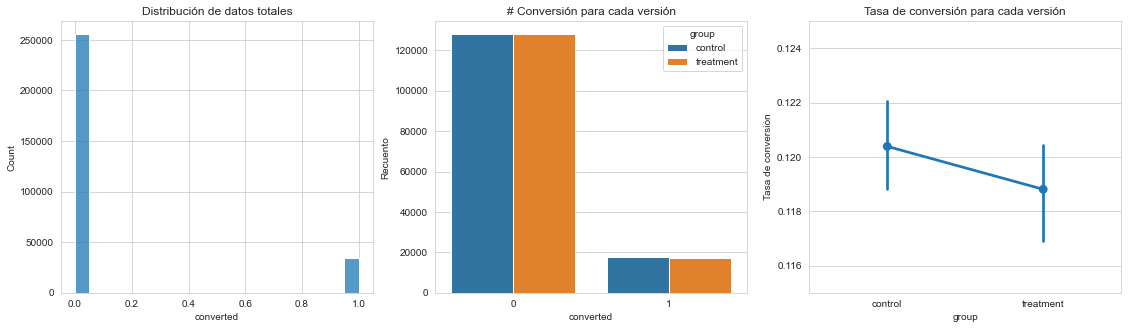

In [12]:
fig, axes = plt.subplots(1,3, figsize=(19,5))

sns.histplot(x="converted", data=df, ax=axes[0])
axes[0].set_title("Distribución de datos totales")

sns.countplot(x="converted", data=df, hue="group", ax=axes[1])
axes[1].set(title="# Conversión para cada versión", ylabel="Recuento")

sns.pointplot(x="group", y="converted",kind="point", data=df, ax=axes[2])
axes[2].set_ylim([0.115, 0.125])
axes[2].set(title="Tasa de conversión para cada versión",ylabel="Tasa de conversión")

plt.show()

<img src=>

Como se puede ver en las cifras anteriores:

El número de conversión es una métrica discreta, con solo 0 o 1 valor, el tamaño de la muestra de los datos es grande, por lo que es mucho mejor aplicar la prueba de chi-cuadrado de Pearson.

La tasa de conversión de la nueva versión es ligeramente más baja que la de la versión anterior, pero existe cierta superposición entre las dos versiones, por lo que la diferencia no parece significativa.

$H_0$: tasa de conversión de la versión de Control = tasa de conversión del tratamiento

$H_1$: tasa de conversión de la versión de Control != tasa de conversión del tratamiento

In [13]:
table = df_counts.iloc[:,0:2].to_numpy()
table

array([[127785, 128046],
       [ 17489,  17264]], dtype=int64)

In [14]:
import scipy.stats as stats
from scipy.stats import shapiro

# prueba de chi-cuadrado 
stat, p, dof, expected = stats.chi2_contingency(table)
print(f"Grados de libertad = {dof}\n")
print(expected)

# interpretar la estadística de prueba
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('\nProb=%.3f, Critical=%.3f, Stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependiente (rechazar H0)')
else:
    print('Independiente (no puede rechazar H0)')

# interpretar el valor p
alpha = 1-prob
print('\nSignificancia=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependiente (rechazar H0)')
else:
    print('Independiente (no puede rechazar H0)')

Grados de libertad = 1

[[127899.65274757 127931.34725243]
 [ 17374.34725243  17378.65274757]]

Prob=0.950, Critical=3.841, Stat=1.704
Independiente (no puede rechazar H0)

Significancia=0.050, p=0.192
Independiente (no puede rechazar H0)


In [23]:
def AB_testing(dataframe, group, metric):
    
    # Dividir grupos
    group_c = dataframe[dataframe[group] == "control"][metric]
    group_t = dataframe[dataframe[group] == "treatment"][metric]
    
    size = dataframe.shape[0]  
    table = pd.DataFrame({"C_COUNT": group_c.value_counts(),
              "T_COUNT": group_t.value_counts()}).to_numpy()
    
    if size < 1000:
        # Prueba exacta de Fisher
        odd_ratio, p_value = stats.fisher_exact(table, alternative="two-sided")
    else:
        # Prueba de chi cuadrado de Pearson
        stat, p_value, dof, expected = stats.chi2_contingency(table)
    
    # Resultado
    temp = pd.DataFrame({
        "Test":[size<1000],
        "P_value":[p_value],
        "Hipótesis AB":[p_value < 0.05], 
    })
    temp["Test"] = np.where(temp["Test"]==True, "Prueba exacta de Fisher", "Prueba de chi cuadrado")
    temp["Hipótesis AB"] = np.where(temp["Hipótesis AB"] == False, "Error al rechazar H0", "Rechazar H0")
    temp["Comentario"] = np.where(temp["Hipótesis AB"] == "Error al rechazar H0", "¡Los grupos A/B son similares!", "¡Los grupos A/B no son similares!")
    
    return temp
   
# Aplicar pruebas A/B
AB_testing(dataframe=df, group = "group", metric = "converted")

,Test,P_value,Hipótesis AB,Comentario
0,Prueba de chi cuadrado,0.191822,Error al rechazar H0,¡Los grupos A/B son similares!


### Método 2: Two-Sample proportions Z-test

<img src=>

**Vamos a definir el experimento y las hipótesis**

**Para testear:** ¿Existe una **diferencia** significativa entre los índices de acción de los usuarios que se dirigieron a las páginas nuevas y antiguas del sitio web?

$H_0$: **NO** hay una diferencia significativa entre los índices de acción de los usuarios que se dirigieron a las páginas nuevas y antiguas del sitio web.

$H_1$: ¡Sí, por supuesto que lo hay!

**Consulte las estadísticas de conversión de cada grupo**

In [16]:
df.groupby(['group','landing_page'])['converted'].agg(['count','sum','mean'])

,,count,sum,mean
group,landing_page,,,
control,old_page,145274,17489,0.120386
treatment,new_page,145310,17264,0.118808


**Definir las observaciones y los conteos de éxito**

In [17]:
nobs = [df[df.landing_page=='old_page']['converted'].count(), df[df.landing_page=='new_page']['converted'].count()]
successes = [df[df.landing_page=='old_page']['converted'].sum(), df[df.landing_page=='new_page']['converted'].sum()]

**Dado que se trata de un problema de proporción, se realizará la prueba Z de proporciones:**

In [18]:
test_stat, pvalue = proportions_ztest(count=successes,nobs=nobs)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1.3109, p-value = 0.1899


El valor p está por encima del umbral $\alpha=0.05$ ===>>> la hipótesis nula $H_0$ **no se puede rechazar.**

Déjame recordarte la hipótesis nula de nuevo:

$H_0$: **NO** hay una diferencia significativa entre los índices de acción de los usuarios que se dirigieron a las páginas nuevas y antiguas del sitio web.

Si no podemos rechazar estadísticamente la hipótesis nula, eso significa que el nuevo diseño **no se desempeñó significativamente diferente** que el anterior.


![](https://i.imgur.com/OkJz0QM.gif)

### Test de hipótesis

En la prueba de la diferencia de dos medias, esperamos que $\tilde{x_1}$ – $\tilde{x_2}$  esté cerca de $\mu_1$ – $\mu_2$. Por lo tanto, la hipótesis nula (que prueba el statu quo de no diferencia), es simplemente $H_0$: $\mu_1$ $=$ $\mu_2$, así la hipótesis alternativa es una de las tres condiciones de no igualdad: $H_1$: $\mu_1$ $\neq$ $\mu_2$ (una prueba de dos colas), $H_1$: $\mu_1$ $>$ $\mu_2$ (una prueba de una cola), o $H_1$: $\mu_1$ $<$ $\mu_2$  (también una prueba de una cola).

El estadístico de prueba, denotado $t_0$, para determinar qué tan diferentes son los resultados de nuestra muestra de lo esperado, siempre que la hipótesis nula sea correcta, viene dado por la fórmula:

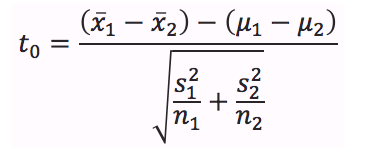

Todavía interpreta la estadística de prueba como una medida general de la diferencia, en términos de desviaciones estándar, de nuestra diferencia de medias muestrales y la diferencia declarada en las medias de la población.

In [20]:
# Asumimos un test de dos lados
C = df[df['group']=='control']['converted']
T = df[df['group']=='treatment']['converted']

n1 = len(C)
n2 = len(T)

# calculamos las medias
sample1_mean = np.mean(C)
sample2_mean = np.mean(T)

# Calculamos las desviaciones estándar s_1 y s_2
population1_sd = np.std(C)
population2_sd = np.std(T)

In [22]:
# estadístico de dos lados
test1 = ((sample1_mean - sample2_mean) / np.sqrt(population1_sd**2/n1 + population2_sd**2/n2))
test2 = "{:.20f}".format(2*stats.norm.sf(abs(test1)))
print('p-value ', test2)

p-value  0.18988237758874337846
